# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['Normal', 'Pheumonia']

In [4]:
X = np.empty([0, 64*64])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.convert('1') # convert image to black and white
        img = img.resize([64, 64])
        img = np.array(img)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        y = np.vstack([y, _class])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1583 [00:00<?, ?it/s]

  0%|          | 0/4265 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Training & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [8]:
clf = MLPClassifier(
    hidden_layer_sizes=(50, 10, 10),
    activation='relu',
    learning_rate_init=0.005,
    max_iter=1000,
    batch_size=X_train_scaled.shape[0],
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [9]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0, batch_size=4678, hidden_layer_sizes=(50, 10, 10),
              learning_rate_init=0.005, max_iter=1000, momentum=0,
              solver='sgd')

## 6.3. Model's Weight & Bias

In [11]:
clf.coefs_

[array([[-0.01258032,  0.0015296 ,  0.02535598, ..., -0.02525006,
          0.0130881 , -0.02543967],
        [ 0.00464314,  0.02264359,  0.00207836, ...,  0.03677101,
          0.01635918, -0.01210396],
        [ 0.00443958,  0.03486432,  0.00668878, ...,  0.02547729,
          0.01317233,  0.00572024],
        ...,
        [ 0.0238785 ,  0.01312817, -0.0360396 , ...,  0.01391381,
         -0.03247156,  0.01573742],
        [ 0.01122993, -0.01212522, -0.02292769, ...,  0.00503755,
          0.02212863, -0.0197083 ],
        [ 0.03666748, -0.01803208,  0.01696578, ...,  0.00048578,
         -0.03761033, -0.01956473]]),
 array([[ 0.14447829,  0.2475122 ,  0.21090834,  0.08241981,  0.24481901,
          0.14082581,  0.18652912, -0.145426  ,  0.16279993, -0.01224406],
        [ 0.28866588, -0.01589233, -0.30256034, -0.24949122,  0.18917335,
          0.16353691, -0.33138762,  0.35627305,  0.00499514, -0.20438834],
        [-0.23047075, -0.05882002,  0.02042918, -0.18064414,  0.2779917 ,
 

In [12]:
clf.intercepts_

[array([ 0.03318414,  0.01684701,  0.00725797,  0.02746325,  0.01449208,
        -0.0244472 , -0.02081416,  0.02847213,  0.03088235,  0.01190015,
         0.01507965, -0.00895417, -0.02295596, -0.00211237, -0.00918698,
        -0.00788492,  0.00656952, -0.02055794, -0.01913331,  0.0306369 ,
        -0.00308081,  0.02353503, -0.01097693, -0.02466698, -0.01006266,
        -0.03259463, -0.02065033,  0.02733985,  0.03926958,  0.02116509,
        -0.00483086, -0.01943261,  0.02399117,  0.02549577, -0.00202338,
         0.02362128,  0.00144339, -0.01828022, -0.00227184, -0.01296998,
         0.03803776,  0.01253966,  0.02372293, -0.02845573,  0.0225935 ,
        -0.01749818,  0.01756677,  0.02338563,  0.01331608, -0.02132861]),
 array([ 0.18996531, -0.16622106,  0.11349206,  0.22466718, -0.24942221,
        -0.19100204, -0.11320493, -0.04219152,  0.22916307,  0.1876951 ]),
 array([ 0.3821488 , -0.1021078 , -0.2326282 , -0.52165499,  0.47917787,
         0.536553  , -0.09744878, -0.0149034 , 

# 7. Prediction

## 7.1. Training Set

In [13]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [14]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

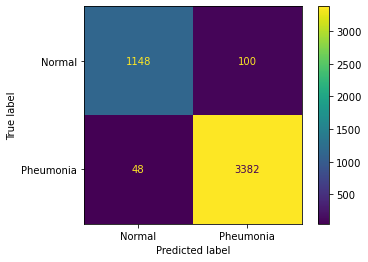

In [15]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [16]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [17]:
print('accuracy =', report['accuracy'])

accuracy = 0.9683625480974776


In [19]:
report['Normal']

{'precision': 0.959866220735786,
 'recall': 0.9198717948717948,
 'f1-score': 0.9394435351882161,
 'support': 1248}

In [20]:
report['Pheumonia']

{'precision': 0.9712808730614589,
 'recall': 0.9860058309037901,
 'f1-score': 0.978587962962963,
 'support': 3430}

## 8.2. Test Set

### 8.2.1. Confusion Matrix

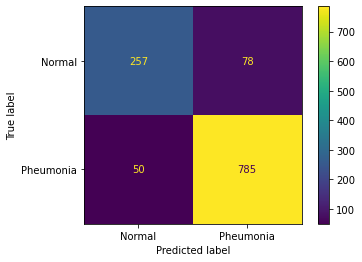

In [21]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [22]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [23]:
print('accuracy =', report['accuracy'])

accuracy = 0.8905982905982905


In [24]:
report['Normal']

{'precision': 0.8371335504885994,
 'recall': 0.7671641791044777,
 'f1-score': 0.8006230529595016,
 'support': 335}

In [25]:
report['Pheumonia']

{'precision': 0.9096176129779838,
 'recall': 0.9401197604790419,
 'f1-score': 0.9246171967020024,
 'support': 835}

# 9. Save Model

In [26]:
import pickle

In [27]:
pickle.dump((clf, scaler), open('pheumonia_model.pickle', 'wb'))